In [ ]:
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### Classification

Q1. Build a classification model for the default of credit card clients dataset. More info here:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

- Explore the data
- Make sure you build a full data pipeline
- Do you require any data pre-processing? Are all the features useful? (Use only raw features)
- set the random seed to 123 (For splitting or any other random algorithm)
- Split data into training (80%) and testing (20%)
- Follow similar procedure as the one for week 2 (End-to-end Machine Learning Project). Remember apendix B
- Study the ROC Curve, decide threshold
- Use 2 classifiers.
    - Random Forest
        - tune only: n_estimators: {3, 4, 6, 7, 10, 20, 50, 100}
    - KNN Classfier
        - tune only: n_neighbors: {3, 4, 5, 7, 10, 20, 50}
    - Which one performs better in the cross validation?
    
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- Cross-validation with 4-folds.

- Other paramenters -> Use default

Notes:
  - Make your code modular, the second part of the assignment you will have to repeat.
  - Include documentation for your code

In [ ]:
"""
Data Set Information:

This research aimed at the case of customersâ€™ default payments in Taiwan and compares the predictive accuracy of
probability of default among six data mining methods. From the perspective of risk management, the result of
predictive accuracy of the estimated probability of default will be more valuable than the binary result of
classification - credible or not credible clients. Because the real probability of default is unknown, this study
presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real
probability of default as the response variable (Y), and the predictive probability of default as the independent
variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by
artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to
zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural
network is the only one that can accurately estimate the real probability of default.


Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable.
This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her
family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.
"""

import os
from six.moves import urllib

DOWNLOAD_ROOT = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/"
CREDIT_PATH = os.path.join("datasets", "credit-default")
CREDIT_URL = DOWNLOAD_ROOT + "default%20of%20credit%20card%20clients.xls"

#CREDIT_URL

def fetch_creditdefault_data(credit_url=CREDIT_URL, credit_path=CREDIT_PATH):
    if not os.path.isdir(credit_path):
        os.makedirs(credit_path)
    file_path = os.path.join(credit_path, "default of credit card clients.xls")

    urllib.request.urlretrieve(credit_url, file_path)
    # The commented code above wont execute in proxy settings. Please download the files from Github
    # https://github.com github.com/RoyMachineLearning/3253-Machine-Learning

#fetch_creditdefault_data()

import pandas as pd

def load_CRDEFAULT_data(credit_path=CREDIT_PATH):
    file_path = os.path.join(credit_path, "default of credit card clients.xls")
    return pd.read_excel(file_path, sheet = 0, skiprows= 1, header = 0)

df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls", skiprows= 1, header = 0)

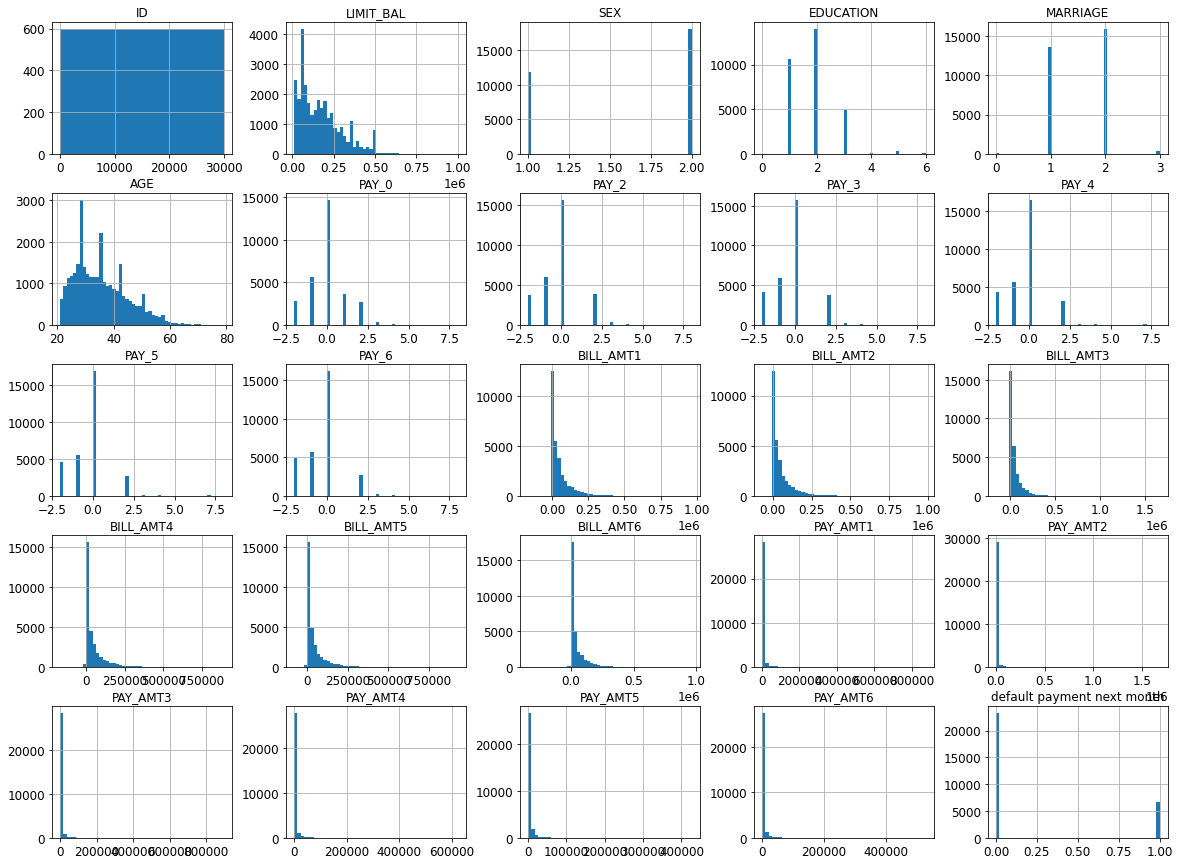

In [ ]:
#Part 1 - Explore the data

import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
#create Training set and Test set using stratified sample on Defaulting payment next month. - Added by Xuan Zhang

from sklearn.model_selection import StratifiedShuffleSplit

df = df.drop('ID',axis=1)

TARGET = "default payment next month"
columns_predictors = [col for col in df.columns if col not in [TARGET]]
columns_categorical = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
columns_numerical = [col for col in columns_predictors if col not in columns_categorical]
print(f"TARGET: {TARGET}")
print(f"columns_predictors: {columns_predictors}")
print(f"columns_categorical: {columns_categorical}")
print(f"columns_numerical: {columns_numerical}")

TARGET: default payment next month
columns_predictors: ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
columns_categorical: ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
columns_numerical: ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [ ]:
X = df[columns_predictors]
y = df[TARGET]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10086, stratify=y) #stratified sampling based on the target
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (22500, 23)
X_test.shape: (7500, 23)
y_train.shape: (22500,)
y_test.shape: (7500,)


In [ ]:
#Create numerical pipeline to transform numerical values

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder ,StandardScaler

#Convert the non transformed Dataframe into list.
columns_categorical_list = list(columns_categorical)
columns_numerical_list = list(columns_numerical)

pipeline_categorical = Pipeline([
  ('onehot', OneHotEncoder()),
])

pipeline_numerical = Pipeline([
  ('scaler', StandardScaler()),
])

pipeline_full = ColumnTransformer([
  ("categorical", pipeline_categorical, columns_categorical_list),
  ("numerical", pipeline_numerical, columns_numerical_list),
])

Using Feature Union to merge both categorical and numerical features

In [ ]:
pipeline_full = ColumnTransformer([
  ("categorical", pipeline_categorical, columns_categorical),
  ("numerical", pipeline_numerical, columns_numerical),
])

pipeline_full.fit(X_train)
X_train_transformed = pipeline_full.transform(X_train)
X_test_transformed = pipeline_full.transform(X_test)
print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print(f"X_test_transformed.shape: {X_test_transformed.shape}")

X_train_transformed.shape: (22500, 91)
X_test_transformed.shape: (7500, 91)


In [ ]:
#Use the two classifiers - Random Forest and KNN Neighbors

#Create the random forest Classifier
from sklearn.ensemble import RandomForestClassifier

random_forest_Classifier = RandomForestClassifier()
random_forest_Classifier.fit(X_train_transformed,y_train)

#Evaluate the ramdon forest model on the training set
from sklearn.model_selection import cross_val_predict
y_probas_forest = cross_val_predict(random_forest_Classifier,X_train_transformed,y_train, cv=4,
                                    method="predict_proba")
y_forest_scores = y_probas_forest[:, 1] # score = proba of positive class

#Create the KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

k_Neighbors_Classifer = KNeighborsClassifier()
k_Neighbors_Classifer.fit(X_train_transformed,y_train)

#Evaluate the ramdon forest model on the training set
from sklearn.model_selection import cross_val_predict
y_probas_neighbors = cross_val_predict(k_Neighbors_Classifer,X_train_transformed,y_train, cv=4,
                                    method="predict_proba")

y_neighbor_scores = y_probas_neighbors[:, 1] # score = proba of positive class

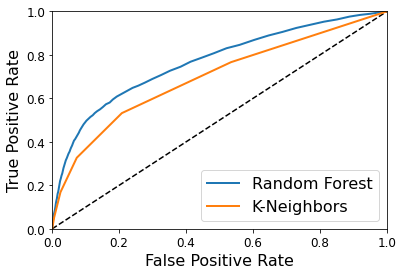

In [ ]:
from sklearn.metrics import roc_curve

#for random forest
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_forest_scores)

#for K Neighbors
fpr_neighbors, tpr_neighbors, thresholds_neighbors = roc_curve(y_train,y_neighbor_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

#Plot the Roc Curve
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot(fpr_neighbors, tpr_neighbors, linewidth=2, label="K-Neighbors")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [ ]:
# Calculate the AUC and choose the best model

from sklearn.metrics import roc_auc_score

auc_randomclassifier = roc_auc_score(y_train,y_forest_scores)
auc_KnnClassifier = roc_auc_score(y_train,y_neighbor_scores)

print(auc_randomclassifier)
print(auc_KnnClassifier)


0.7658826275122254
0.695245008279884


In [ ]:
#Create the confusion Matrix for Random Forest
from sklearn.metrics import confusion_matrix

#need to create a binary classifier as Classification metrics can't handle a mix of binary and continuous targets
predict_RClassifier = cross_val_predict(random_forest_Classifier,X_train_transformed,y_train, cv=4)
confusion_matrix(y_train,predict_RClassifier)

array([[16553,   970],
       [ 3117,  1860]])

In [ ]:
#Print the Precision / Recall Score
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train,predict_RClassifier))
print(recall_score(y_train,predict_RClassifier))

0.657243816254417
0.37371910789632307


In [ ]:
from sklearn.metrics import confusion_matrix

#need to create a binary classifier for K Neighbors as Classification metrics can't handle a mix of binary and continuous targets
predict_Kneighbors = cross_val_predict(k_Neighbors_Classifer,X_train_transformed,y_train, cv=4)
confusion_matrix(y_train,predict_Kneighbors)

array([[16236,  1287],
       [ 3350,  1627]])

In [ ]:
#Print the Precision / Recall Score
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train,predict_Kneighbors))
print(recall_score(y_train,predict_Kneighbors))

0.5583390528483184
0.3269037572835041


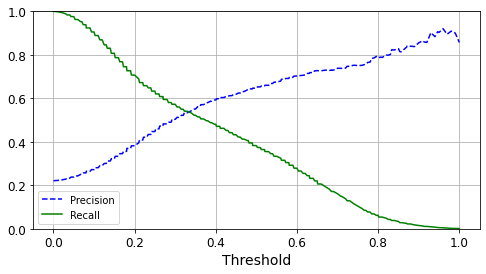

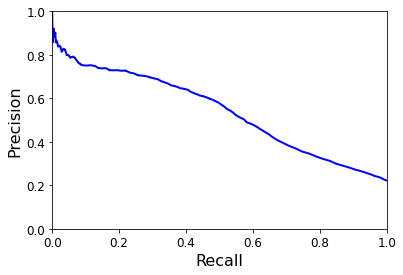

In [ ]:
#create a precision - recall curve
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train,y_forest_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="best")
    plt.ylim([0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.show()

#plot the precision and recall curve

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])


plot_precision_vs_recall(precisions, recalls)
plt.show()

In [ ]:
#it is the case of default, so I increase the Recall to 76%, This will improve my accuracy for defaults

#Current Precision and Recall Score for the best Model - 0.611881892565 AND 0.323978150311
#the Recall value for Random forest classifier is too low, thus we need to caliberate our threshhold - to reset the recall to 76%

#To change the threshholds, we consider changing the probabilities generated from the method = predict_proba

Recall_Threshhold = (y_forest_scores > .15)
print(precision_score(y_train,Recall_Threshhold))
print(recall_score(y_train,Recall_Threshhold))
Recall_Threshhold

0.3333333333333333
0.7872212176009644


array([ True,  True,  True, ...,  True,  True, False])

In [ ]:
from sklearn.model_selection import cross_val_score

Average_Score = cross_val_score(random_forest_Classifier,X_train_transformed, Recall_Threshhold, cv = 4, scoring = "accuracy")

print(Average_Score) # [ 0.72333333  0.727       0.7195      0.71966667]

print(np.average(Average_Score))

[0.81297778 0.81955556 0.81617778 0.82186667]
0.8176444444444445


Use the new threshold on Grid Search for Random Forest

In [ ]:
NewR_Threshhold = Recall_Threshhold.astype(int)

#Now run Grid Search on the RandomForest and use the new threshhold
from sklearn.model_selection import GridSearchCV
n_estimators = [3, 4, 6, 7, 10, 20, 50, 100]
param_grid = {'n_estimators' : n_estimators}

#tune the random forest classifier with the hyper parameters

Random_Forest_Classifier = RandomForestClassifier()
grid_search = GridSearchCV(Random_Forest_Classifier,param_grid,cv=4,refit = True,scoring='roc_auc', n_jobs = -1, verbose=0)
grid_search.fit(X_train_transformed, NewR_Threshhold)


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
#get the best parameters and estimators
forest_best_param_ = grid_search.best_params_
forest_best_estimators_ = grid_search.best_estimator_

print(forest_best_param_)
print(forest_best_estimators_)

y_pred = forest_best_estimators_.predict(X_test_transformed)

{'n_estimators': 100}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
# Check the model accuracy for test set

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.628

In [ ]:
###############################################################
#Second Part of the Assignment - Cross-validation with 5-folds
#Did you get different results compared to the 4-fold case?
###############################################################

#Use the two classifiers - Random Forest and KNN Neighbors
random_forest_Classifier = RandomForestClassifier()
random_forest_Classifier.fit(X_train_transformed,y_train)

#Evaluate the ramdon forest model on the training set
y_probas_forest = cross_val_predict(random_forest_Classifier,X_train_transformed,y_train, cv=5,
                                    method="predict_proba")
y_forest_scores = y_probas_forest[:, 1] # score = proba of positive class

#Create the KNN Classifier
k_Neighbors_Classifier = KNeighborsClassifier()
k_Neighbors_Classifier.fit(X_train_transformed,y_train)

#Evaluate the randon forest model on the training set
from sklearn.model_selection import cross_val_predict

y_probas_neighbors = cross_val_predict(k_Neighbors_Classifier,X_train_transformed,y_train, cv=5,
                                    method="predict_proba")

y_neighbor_scores = y_probas_neighbors[:, 1] # score = proba of positive class


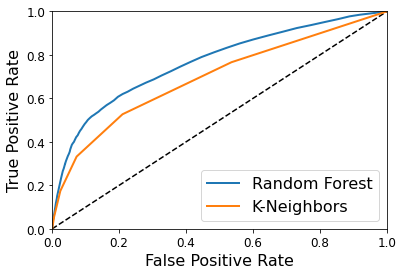

In [ ]:
from sklearn.metrics import roc_curve

#for random forest
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_forest_scores)

#for K Neighbors
fpr_neighbors, tpr_neighbors, thresholds_neighbors = roc_curve(y_train,y_neighbor_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

#Plot the Roc Curve
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot(fpr_neighbors, tpr_neighbors, linewidth=2, label="K-Neighbors")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [ ]:
# Calculate the AUC and choose the best model

auc_randomclassifier = roc_auc_score(y_train,y_forest_scores)
auc_KnnClassifier = roc_auc_score(y_train,y_neighbor_scores)

print(auc_randomclassifier)
print(auc_KnnClassifier)

0.765205507165983
0.6940776341357999


In [ ]:
#Create the confusion Matrix for Random Forest
from sklearn.metrics import confusion_matrix

#need to create a binary classifier as Classification metrics can't handle a mix of binary and continuous targets
predict_RClassifier = cross_val_predict(random_forest_Classifier,X_train_transformed,y_train, cv=10)
confusion_matrix(y_train,predict_RClassifier)

array([[16508,  1015],
       [ 3117,  1860]])

In [ ]:
#Print the Precision / Recall Score
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train,predict_RClassifier))
print(recall_score(y_train,predict_RClassifier))

0.6469565217391304
0.37371910789632307


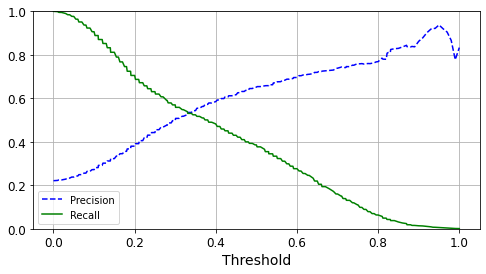

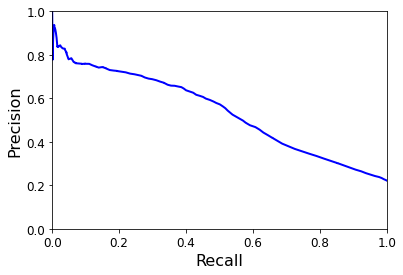

In [ ]:
#create a precision - recall curve
precisions, recalls, thresholds = precision_recall_curve(y_train,y_forest_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="best")
    plt.ylim([0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.show()

#plot the precision and recall curve

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])


plot_precision_vs_recall(precisions, recalls)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
Recall_Threshhold = (y_forest_scores > .15)
print(precision_score(y_train,Recall_Threshhold))
print(recall_score(y_train,Recall_Threshhold))
Recall_Threshhold

Average_Score = cross_val_score(random_forest_Classifier, X_train_transformed, Recall_Threshhold, cv = 5, scoring = "accuracy")

print(Average_Score) # [ 0.72333333  0.727       0.7195      0.71966667]

print(np.average(Average_Score))

### SEE the Recall score has improved!

0.3347241144414169
0.7898332328712075
[0.81688889 0.81666667 0.81866667 0.81177778 0.83355556]
0.8195111111111112


In [ ]:
NewR_Threshhold = Recall_Threshhold.astype(int)

#Now run Grid Search on the RandomForest and use the new threshhold
n_estimators = [3, 4, 6, 7, 10, 20, 50, 100]
param_grid = {'n_estimators' : n_estimators}

#tune the random forest classifier with the hyper parameters

grid_search = GridSearchCV(Random_Forest_Classifier,param_grid,cv=5,scoring='roc_auc',refit = True) #change to roc / auc
grid_search.fit(X_train_transformed, NewR_Threshhold)

y_pred = forest_best_estimators_.predict(X_test_transformed)

accuracy_score(y_test, y_pred)

0.628

#### Conclusions?

<pre>

Random Forest Classifier is a better model over the KNN Classifier. I observed the AUC for the Random Classifier
is greater than KNN Classifier.

Once the threshhold is selected based on the higher number of recalls required to get credit defaults, this will
significantly change the model accuracy, As more we expect more false positive values in the final prediction.
The higher false positive, thus affects the accuracy of the model - as it gets lower for the Test data.

</pre>